### Import the needed packages

In [29]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.svm import SVC

### Download stock price data; extract rise and fall information

In [30]:
ticker = '^GSPC'
Start_date = '2010-11-14'
End_date = '2023-11-14'
lags = 6  ## using past 6 days information as input

prices = yf.download(ticker, start=Start_date, end=End_date)['Adj Close']
df = pd.DataFrame({'Price': prices})  ## Create a dataframe to store requied information
df['Returns'] = np.log(df / df.shift())
df.dropna(inplace=True)

cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    df[col] = np.sign(df['Returns'].shift(lag))
    cols.append(col)
df.dropna(inplace=True)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Price,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2010-11-24,1198.349976,0.014813,-1.0,-1.0,1.0,1.0,1.0,-1.0
2010-11-26,1189.400024,-0.007497,1.0,-1.0,-1.0,1.0,1.0,1.0
2010-11-29,1187.760010,-0.001380,-1.0,1.0,-1.0,-1.0,1.0,1.0
2010-11-30,1180.550049,-0.006089,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-12-01,1206.069946,0.021387,-1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [31]:
df[cols]  ## independent variables

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,
2010-11-24,-1.0,-1.0,1.0,1.0,1.0,-1.0
2010-11-26,1.0,-1.0,-1.0,1.0,1.0,1.0
2010-11-29,-1.0,1.0,-1.0,-1.0,1.0,1.0
2010-11-30,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-12-01,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...
2023-11-07,1.0,1.0,1.0,1.0,1.0,1.0
2023-11-08,1.0,1.0,1.0,1.0,1.0,1.0
2023-11-09,1.0,1.0,1.0,1.0,1.0,1.0


In [32]:
np.sign(df['Returns']) ## dependent variables

Date
2010-11-24    1.0
2010-11-26   -1.0
2010-11-29   -1.0
2010-11-30   -1.0
2010-12-01    1.0
             ... 
2023-11-07    1.0
2023-11-08    1.0
2023-11-09   -1.0
2023-11-10    1.0
2023-11-13   -1.0
Name: Returns, Length: 3264, dtype: float64

### Train Test Split to avoid overfitting

In [33]:
from sklearn.model_selection import train_test_split
X = df[cols]
y = np.sign(df['Returns'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

### Taining model

In [34]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)

SVC(gamma='auto')

<Axes: xlabel='Date'>

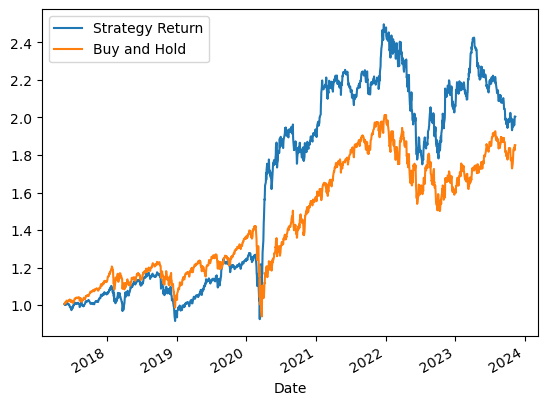

In [35]:
predict_sign = model.predict(X_test) # we using the predict sign to invest stock, if it is 1, we long, if it -1, we short
strategy_return = predict_sign * df.loc[X_test.index]['Returns']
compare_df = pd.DataFrame({'Strategy Return': strategy_return})
compare_df['Buy and Hold'] = df.loc[X_test.index]['Returns']
compare = compare_df[['Strategy Return', 'Buy and Hold']].cumsum().apply(np.exp)
compare.plot()

### Model preformance with over fitting issue

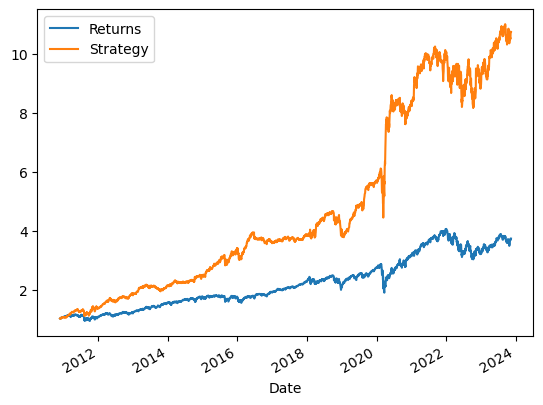

In [36]:
model = SVC(gamma='auto')
model.fit(X, y)
df['Prediction'] = model.predict(X)
df['Strategy'] = df['Prediction'] * df['Returns']
compare = df[['Returns', 'Strategy']].cumsum().apply(np.exp)
compare.plot()
plt.show()    